In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
df  = pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 45211
Total Number of columns : 17


In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [ ]:
print(df.job.value_counts())
print('\n',df.marital.value_counts())
print('\n',df.education.value_counts())
print('\n',df.default.value_counts())
print('\n',df.housing.value_counts())
print('\n',df.loan.value_counts())
print('\n',df.contact.value_counts())
print('\n',df.month.value_counts())
print('\n',df.poutcome.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

 no     44396
yes      815
Name: default, dtype: int64

 yes    25130
no     20081
Name: housing, dtype: int64

 no     37967
yes     7244
Name: loan, dtype: int64

 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

 unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

In [ ]:
replaceStruct = {
                "job" :      {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, 
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2},
                "Target":    {"no": 0, "yes": 1} 
                    }

df=df.replace(replaceStruct)
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,2,3,0,2143,1,0,-1,5,5,261,1,-1,0,-1,no
1,44,3,1,2,0,29,1,0,-1,5,5,151,1,-1,0,-1,no
2,33,8,2,2,0,2,1,1,-1,5,5,76,1,-1,0,-1,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  int64   
 2   marital    45211 non-null  int64   
 3   education  45211 non-null  int64   
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  int64   
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int64   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int64   
 16  y          45211 non-null  category
dtypes: category(1), int64(16)
memory usage: 5.6 MB


In [ ]:
df.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [ ]:
for value in df.columns:
     print(value,":", sum(df[value] == '?'))

age : 0
job : 0
marital : 0
education : 0
default : 0
balance : 0
housing : 0
loan : 0
contact : 0
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 0
y : 0


In [ ]:
#Descriptive Statistics :-
df_transpose = df.describe().T
df_transpose

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,3.618212,2.610178,-1.0,2.0,3.0,5.0,11.0
marital,45211.0,1.832275,0.608230,1.0,1.0,2.0,2.0,3.0
education,45211.0,2.019442,0.902795,-1.0,2.0,2.0,3.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.488310,0.976936,-1.0,-1.0,1.0,1.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [ ]:
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
age,18.0,33.0,39.0,48.0,95.0
job,-1.0,2.0,3.0,5.0,11.0
marital,1.0,1.0,2.0,2.0,3.0
education,-1.0,2.0,2.0,3.0,3.0
default,0.0,0.0,0.0,0.0,1.0
balance,-8019.0,72.0,448.0,1428.0,102127.0
housing,0.0,0.0,1.0,1.0,1.0
loan,0.0,0.0,0.0,0.0,1.0
contact,-1.0,-1.0,1.0,1.0,2.0
day,1.0,8.0,16.0,21.0,31.0


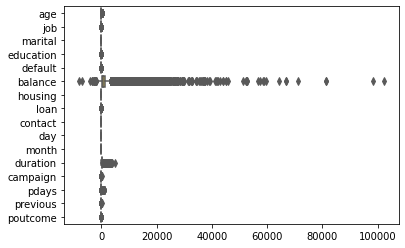

In [ ]:
sns.boxplot(data=df, orient="h", palette="Set2", dodge=False)

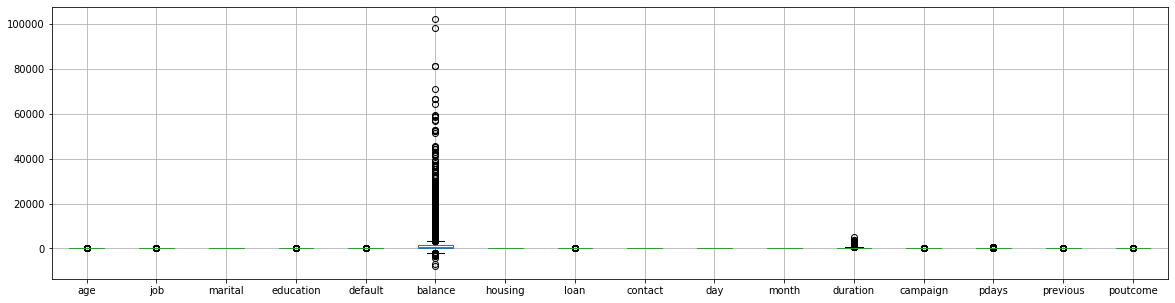

In [ ]:
df.boxplot(return_type='axes', figsize=(20,5))

In [ ]:
Q1 =  df['balance'].quantile(0.25) # 1º Quartile
Q3 =  df['balance'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range
print('Interquartile range = ', IQR)
print('Numerber of outliers in balance column below the lower whisker :', df[df['balance'] < (Q1-(1.5*IQR))]['balance'].count())
print('Numerber of outliers above balance column the uper whisker  :', df[df['balance'] > (Q3+(1.5*IQR))]['balance'].count())

Interquartile range =  1356.0
Numerber of outliers in balance column below the lower whisker : 17
Numerber of outliers above balance column the uper whisker  : 4712


In [ ]:
for i in df.describe().columns:
    Q1 = df.describe().at['25%', i]
    Q3 = df.describe().at['75%', i]
    IQR = Q3-Q1
    LTV = Q1 - 1.5 * IQR # lower bound 
    UTV = Q3 + 1.5 * IQR # upper bound
    print('Column Name                                         :', i)
    print('Interquartile range IQR                             :', IQR)
    print('Numerber of outliers below the lower whisker        :', df[df[i] < LTV][i].count())
    print('Numerber of outliers above the upper whisker         :', df[df[i] > UTV][i].count())
    print('Total Numbers of Ourliers                           :', (df[df[i] < LTV][i].count()) + (df[df[i] > UTV][i].count()))
    
    print('\n')

Column Name                                         : age
Interquartile range IQR                             : 15.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 487
Total Numbers of Ourliers                           : 487


Column Name                                         : job
Interquartile range IQR                             : 3.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 2178
Total Numbers of Ourliers                           : 2178


Column Name                                         : marital
Interquartile range IQR                             : 1.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 0
Total Numbers of Ourliers                           : 0


Column Name                                         : education
Interquartile range IQR                             : 1.0
Nu

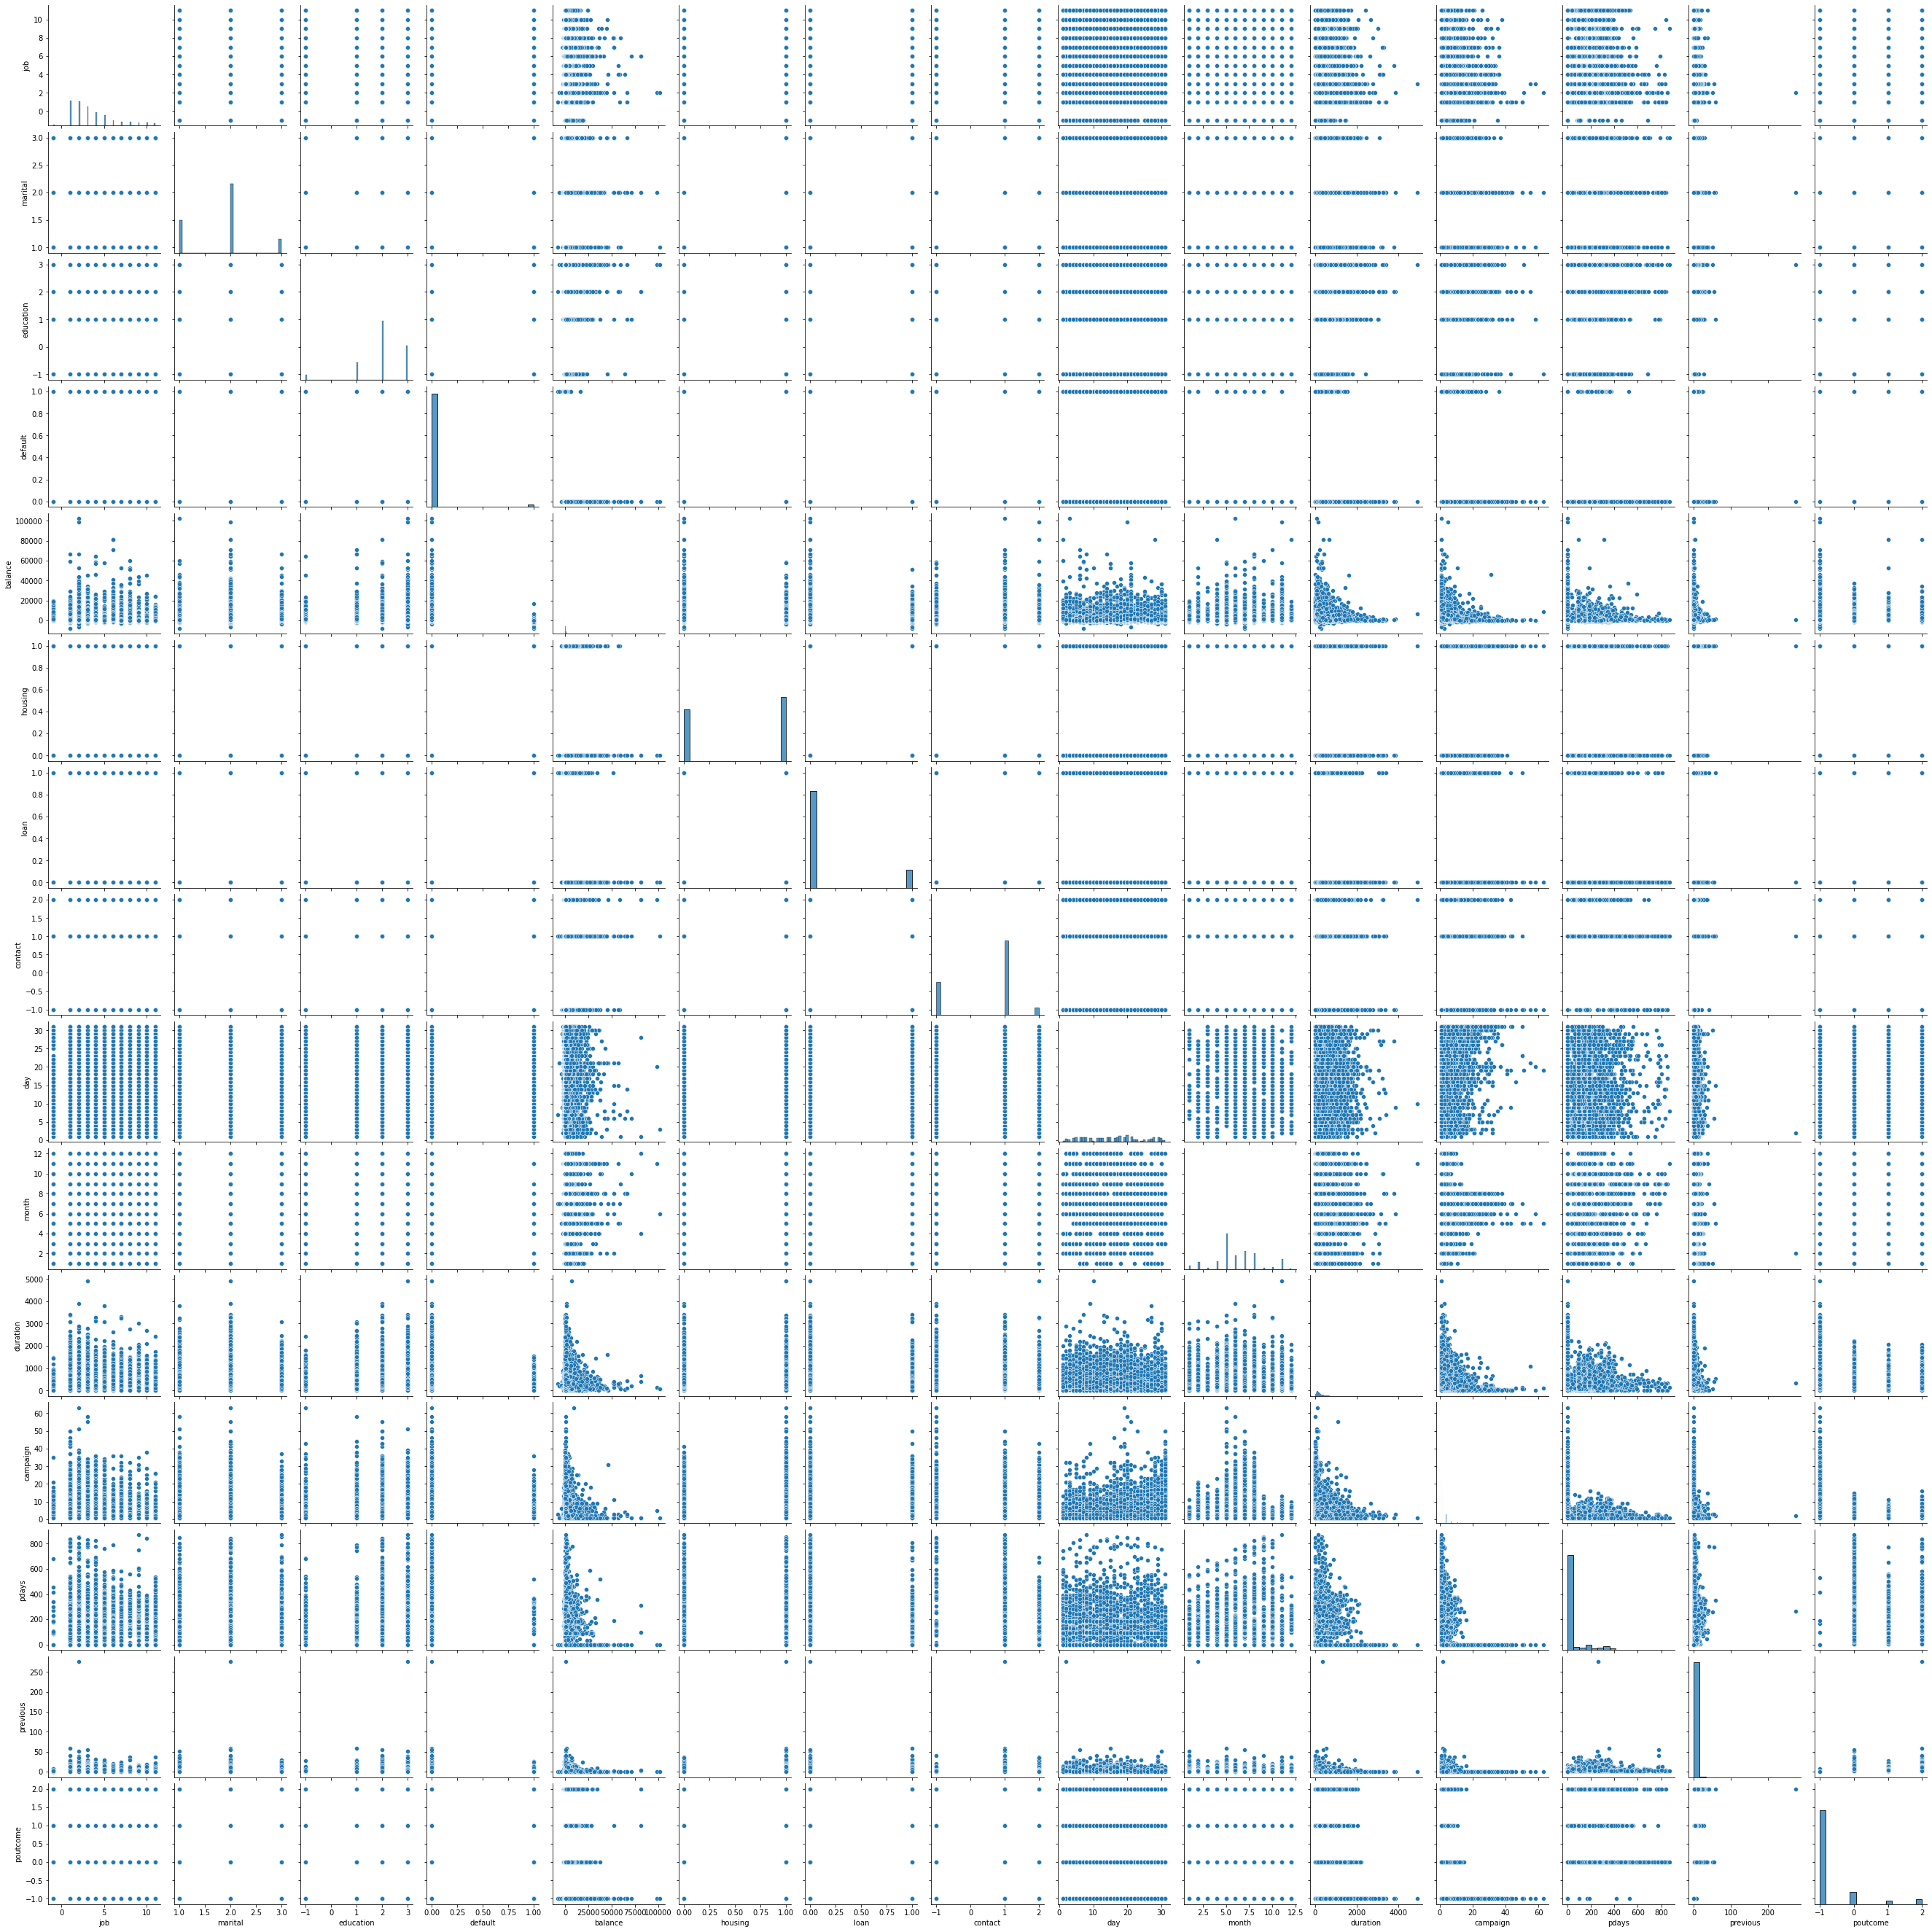

In [ ]:
sns.pairplot(df.iloc[:,1:])

In [ ]:
subscriber_counts = pd.DataFrame(df["y"].value_counts()).reset_index()
subscriber_counts.columns =["Labels","y"]
subscriber_counts

,Labels,y
0,no,39922
1,yes,5289


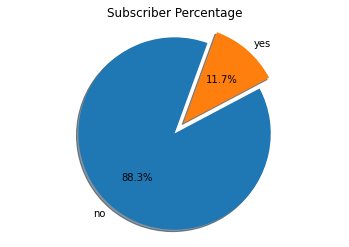

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(subscriber_counts["y"], explode=explode, labels=subscriber_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Subscriber Percentage")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


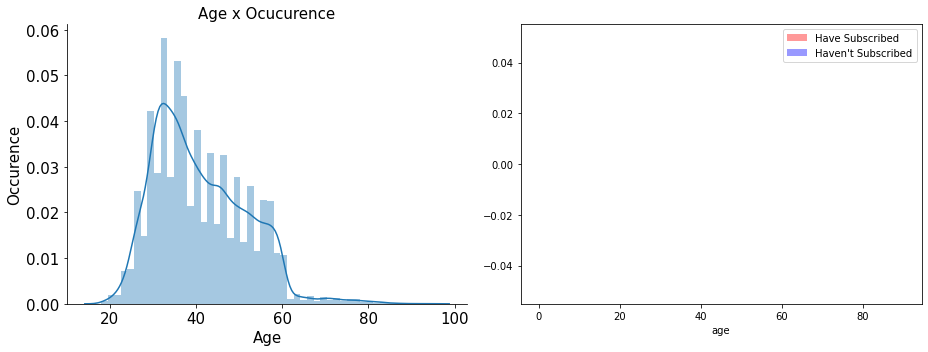

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

sns.distplot(df['age'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Occurence', fontsize=15)
ax1.set_title('Age x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

#Age group
bins = range(0, 100, 10)
ax2 = sns.distplot(df.age[df.y==1], color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.y==0], ax=ax2,  
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


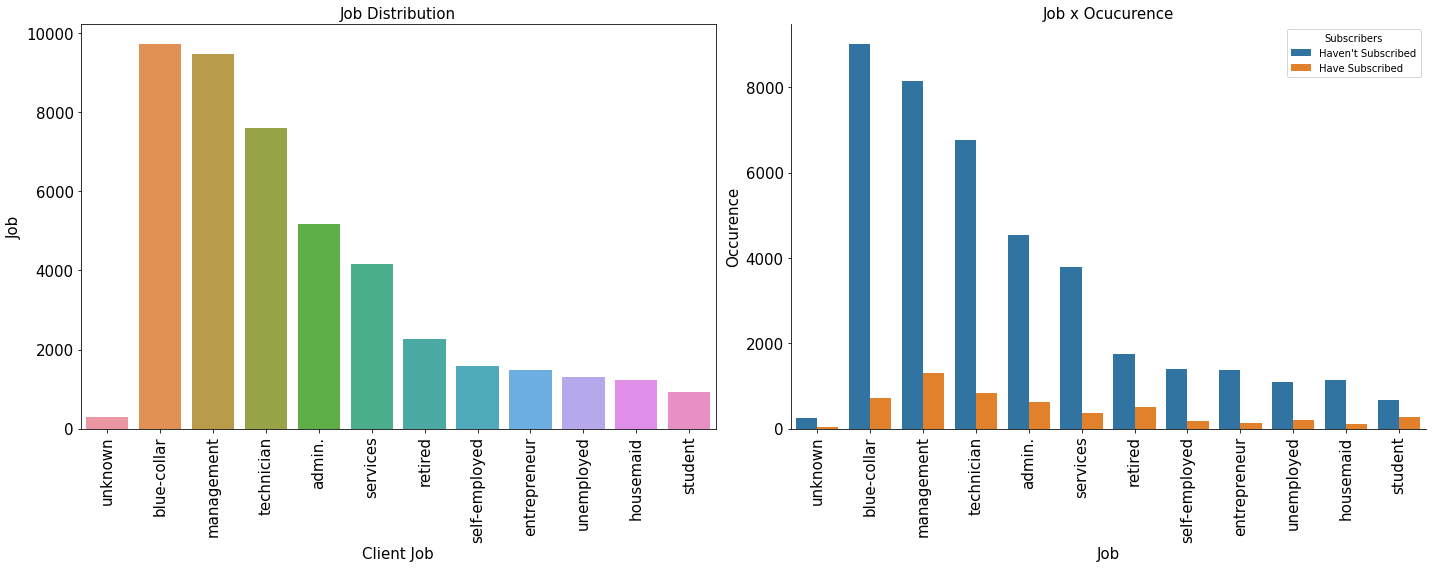

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20, 8)

sns.countplot(x = 'job', data = df, ax = ax1, )
ax1.set_xlabel('Client Job', fontsize=15)
ax1.set_ylabel('Job', fontsize=15)
ax1.set_title('Job Distribution', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticklabels(replaceStruct['job'], rotation=90)

sns.countplot(df['job'], data = df, hue = 'y', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Job', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Job x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['job'], rotation=90)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


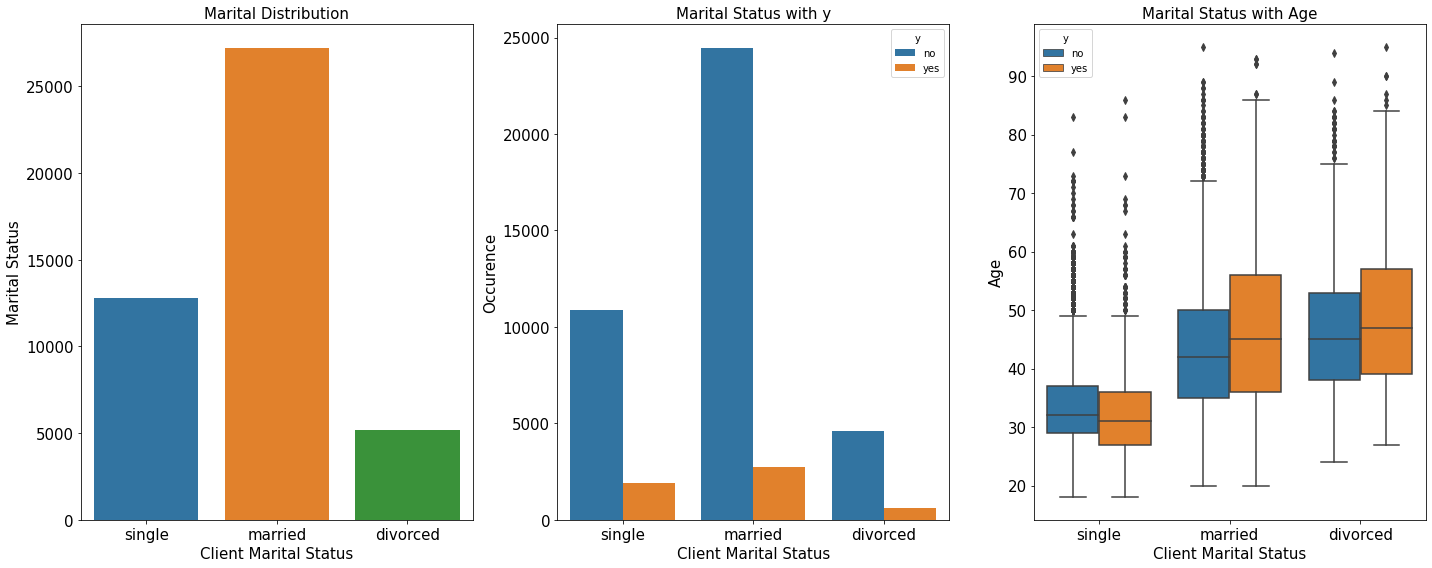

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))
fig.set_size_inches(20, 8)

sns.countplot(x = 'marital', data = df, ax = ax1)
ax1.set_xlabel('Client Marital Status', fontsize=15)
ax1.set_ylabel('Marital Status', fontsize=15)
ax1.set_title('Marital Distribution', fontsize=15)
ax1.set_xticklabels(replaceStruct['marital'])
ax1.tick_params(labelsize=15)

sns.countplot(df['marital'], data = df, hue = 'y', ax = ax2)
ax2.set_xlabel('Client Marital Status', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Marital Status with y', fontsize=15)
ax2.set_xticklabels(replaceStruct['marital'])
ax2.tick_params(labelsize=15)

sns.boxplot(x="marital", y='age', hue="y", data=df, ax=ax3)
ax3.set_xlabel('Client Marital Status', fontsize=15)
ax3.set_ylabel('Age', fontsize=15)
ax3.set_title('Marital Status with Age', fontsize=15)
ax3.set_xticklabels(replaceStruct['marital'])
ax3.tick_params(labelsize=15)

ax3.set_xticklabels(replaceStruct['marital'])
plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


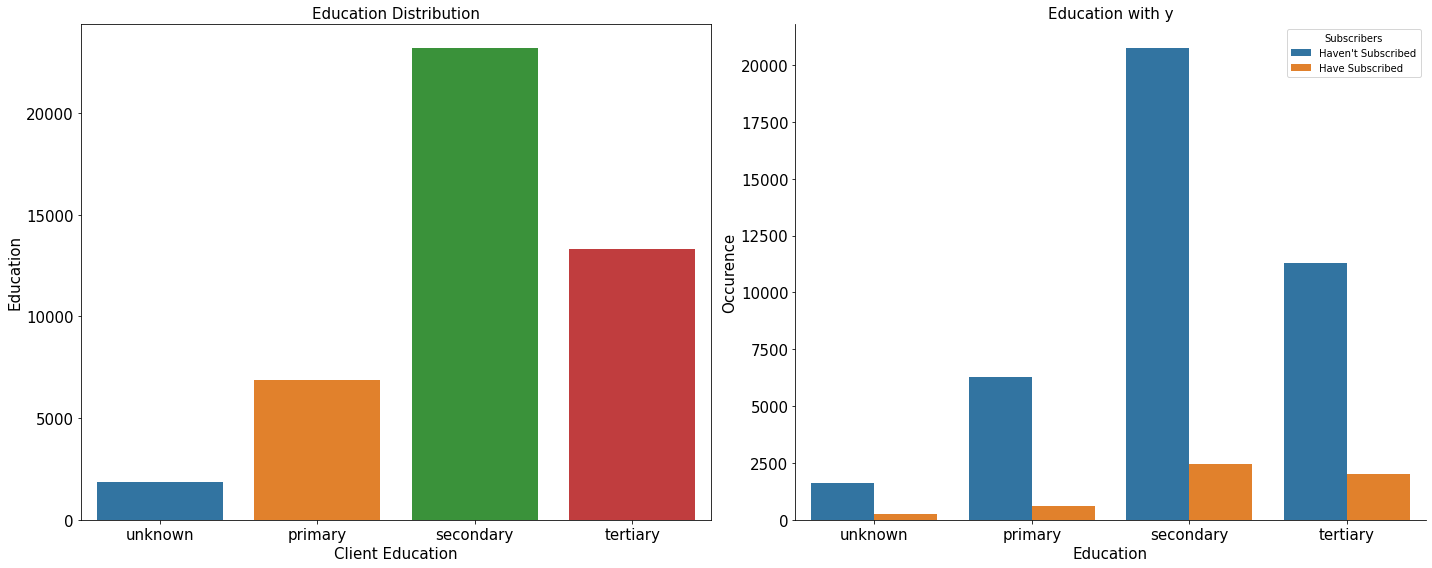

In [ ]:

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20, 8)

sns.countplot(x = 'education', data = df, ax = ax1)
ax1.set_xlabel('Client Education', fontsize=15)
ax1.set_ylabel('Education', fontsize=15)
ax1.set_title('Education Distribution', fontsize=15)
ax1.set_xticklabels(replaceStruct['education'])
ax1.tick_params(labelsize=15)


sns.countplot(df['education'], data = df, hue = 'y', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Education', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Education with y', fontsize=15)
ax2.set_xticklabels(replaceStruct['education'])
ax2.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered

Text(0.5, 1.0, 'balance Distribution')

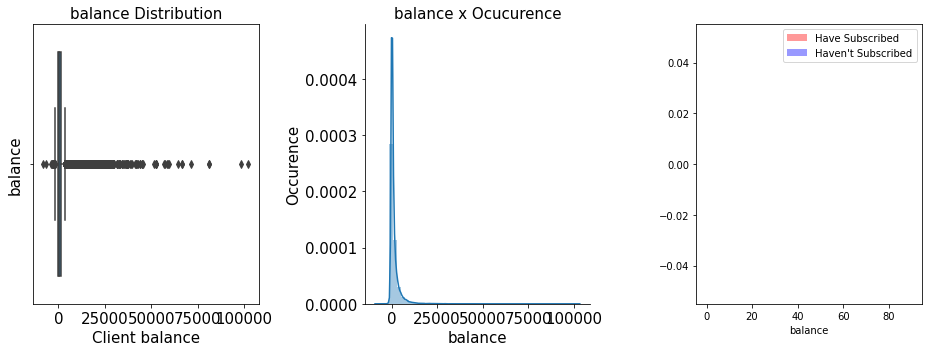

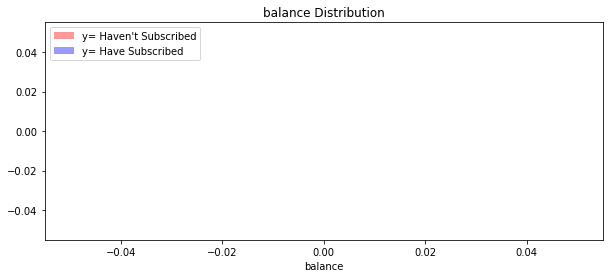

In [ ]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
sns.boxplot(x = 'balance', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Client balance', fontsize=15)
ax1.set_ylabel('balance', fontsize=15)
ax1.set_title('balance Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['balance'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('balance', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('balance x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

bins = range(0, 100, 10)
ax3 = sns.distplot(df.balance[df.y==1], color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.balance[df.y==0], ax=ax3, color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

plt.figure(figsize=(10,4))
sns.distplot(df[df["y"] == 0]['balance'], color = 'r',label="y= Haven't Subscribed")
sns.distplot(df[df["y"] == 1]['balance'], color = 'b',label='y= Have Subscribed')
plt.legend()
plt.title("balance Distribution")

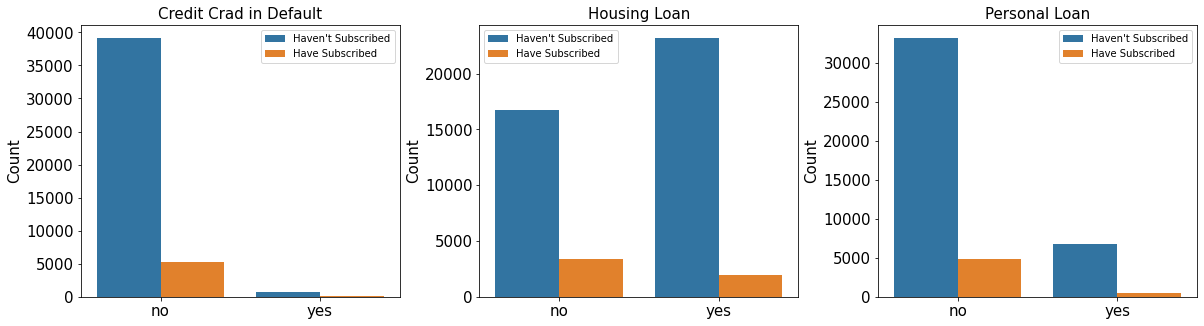

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
sns.countplot(x = 'default', data = df, hue='y', ax = ax1)
ax1.set_title('Credit Crad in Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticklabels(replaceStruct['default'])
ax1.legend(["Haven't Subscribed", "Have Subscribed"])
# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df,  hue='y', ax = ax2)
ax2.set_title('Housing Loan', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['housing'])
ax2.legend(["Haven't Subscribed", "Have Subscribed"])
# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df,  hue='y', ax = ax3)
ax3.set_title('Personal Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)
ax3.set_xticklabels(replaceStruct['loan'])
ax3.legend(["Haven't Subscribed", "Have Subscribed"])

plt.subplots_adjust(wspace=0.25)

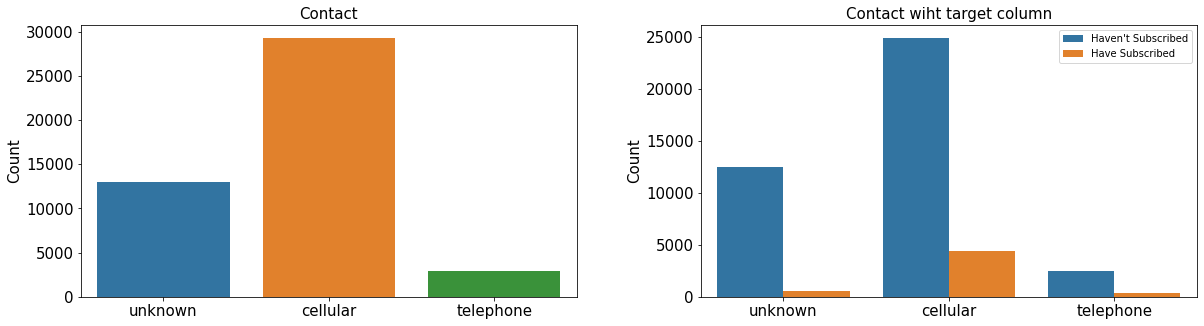

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.countplot(x = 'contact', data = df,  ax = ax1)
ax1.set_title('Contact', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.set_xticklabels(replaceStruct['contact'])
ax1.tick_params(labelsize=15)

sns.countplot(x = 'contact', data = df, hue='y', ax = ax2)
ax2.set_title('Contact wiht target column', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['contact'])
ax2.legend(["Haven't Subscribed", "Have Subscribed"])
plt.subplots_adjust(wspace=0.25)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


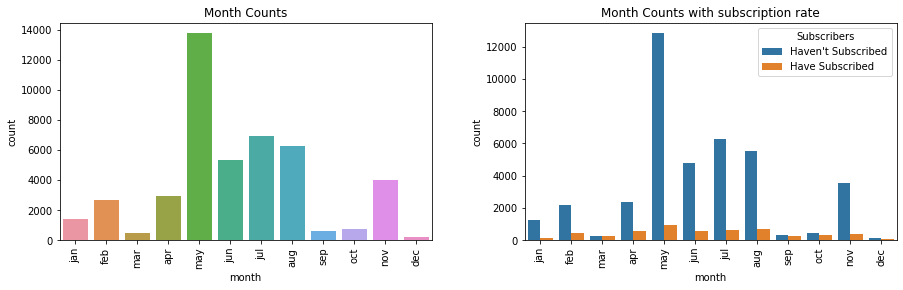

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))

sns.countplot(df['month'],ax = ax1)
ax1.set_xticklabels(replaceStruct['month'], rotation=90)
ax1.set_title('Month Counts')


sns.countplot(x = 'month', data=df, hue='y',ax = ax2)
ax2.set_xticklabels(replaceStruct['month'], rotation=90)
ax2.set_title('Month Counts with subscription rate')

plt.subplots_adjust(wspace=0.25)
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

 The bank contacted most clients between May and July. The highest contact rate is around 30%, which happened in May, while the contact rate is very less in March, September, October, and December. The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 30% to 40%.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


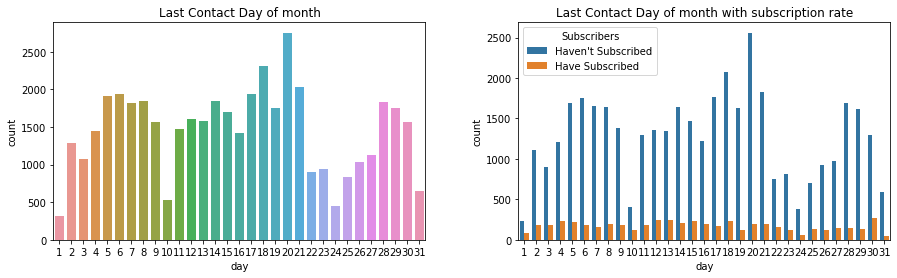

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))

sns.countplot(df['day'],ax = ax1)
ax1.set_title('Last Contact Day of month')


sns.countplot(x = 'day', data=df, hue='y',ax = ax2)
ax2.set_title('Last Contact Day of month with subscription rate')

plt.subplots_adjust(wspace=0.25)
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

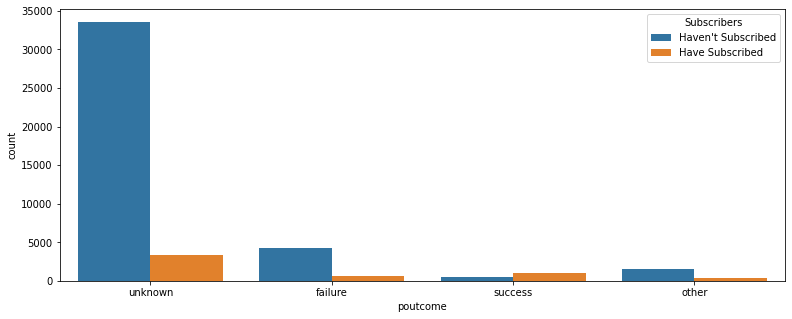

In [ ]:
fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 5))
sns.countplot(x = 'poutcome', data=df, hue='y')
ax.set_xticklabels(replaceStruct['poutcome'])
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

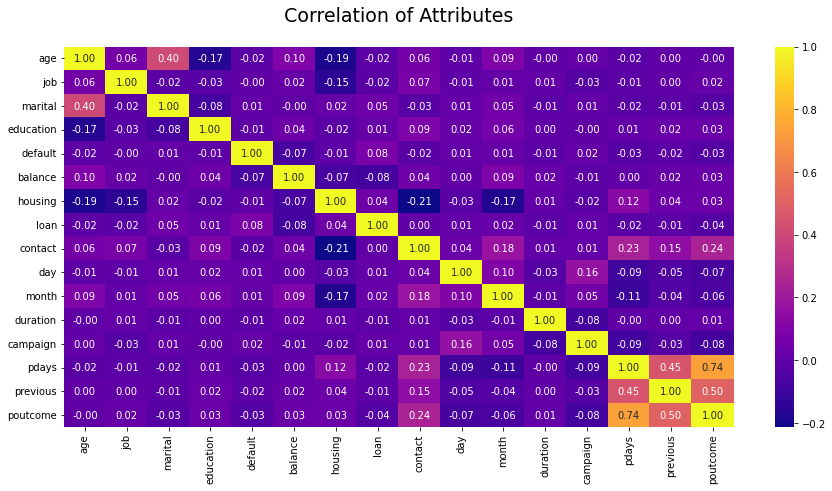

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

'Campaign outcome' has a strong correlation with 'duration',
A moderate correlation between 'Campaign outcome' and 'previous contacts'.
Mild correlations between 'balance', 'month of contact' and 'number of campaign'.

Dimensionality Reduction : -
As we have seen above 'Contact' is not relevent for our model building so we will drop it.

In [ ]:
df = df.drop(['contact'], axis=1)
df.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,2,3,0,2143,1,0,5,5,261,1,-1,0,-1,no


In [ ]:
df['poutcome'].head(4)

0   -1
1   -1
2   -1
3   -1
Name: poutcome, dtype: int64

In [ ]:
df.loc[df['poutcome'] == -1, 'poutcome'] = 2
df['poutcome'].head(4)

0    2
1    2
2    2
3    2
Name: poutcome, dtype: int64

In [ ]:
#There are three columns 'job', 'marital', 'poutcome' for which I will be converting to dummy variable.
df.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,2,3,0,2143,1,0,5,5,261,1,-1,0,2,no


In [ ]:
oneHotCols=["job", "marital", "poutcome"]
df=pd.get_dummies(df, columns=oneHotCols)
df.head(1)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_8,job_9,job_10,job_11,marital_1,marital_2,marital_3,poutcome_0,poutcome_1,poutcome_2
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df.shape

(45211, 31)

In [ ]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_-1',
       'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8',
       'job_9', 'job_10', 'job_11', 'marital_1', 'marital_2', 'marital_3',
       'poutcome_0', 'poutcome_1', 'poutcome_2'],
      dtype='object')

In [ ]:
X = df.drop('y', axis=1)
y = df[['y']]
df.head(1)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_8,job_9,job_10,job_11,marital_1,marital_2,marital_3,poutcome_0,poutcome_1,poutcome_2
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
print('x train data {}'.format(x_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (31647, 30)
y train data (31647, 1)
x test data  (13564, 30)
y test data  (13564, 1)


In [ ]:
X_train_scaled = preprocessing.scale(x_train)
X_test_scaled = preprocessing.scale(X_test)

X_train = X_train_scaled
X_test  = X_test_scaled

In [ ]:
LogReg = LogisticRegression(solver = 'lbfgs')
LogReg.fit(X_train, y_train.values.ravel())

# Predicting for test set
LogReg_y_pred               = LogReg.predict(X_test)
LogReg_Score                = LogReg.score(X_test, y_test)

LogReg_ScoreAccuracy        = accuracy_score(y_test, LogReg_y_pred)

LogReg_PrecisonScore        = precision_score(y_test, LogReg_y_pred,pos_label='yes')
LogReg_RecollScore          = recall_score(y_test, LogReg_y_pred,pos_label='yes')
LogReg_F1                   = f1_score(y_test, LogReg_y_pred,pos_label='yes')

cross_validation_result = model_selection.cross_val_score(LogReg, X_train, y_train.values.ravel(), scoring='accuracy')

base_model_results = pd.DataFrame([['Logistic Regression', LogReg_ScoreAccuracy, LogReg_PrecisonScore,
                                LogReg_RecollScore, LogReg_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

print('\nLogistic Regression classification Report : \n',metrics.classification_report(y_test, LogReg_y_pred))



Logistic Regression classification Report : 
               precision    recall  f1-score   support

          no       0.92      0.98      0.95     12030
         yes       0.63      0.32      0.42      1534

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



In [ ]:
Knn = KNeighborsClassifier(n_neighbors=9, weights = 'uniform', metric='euclidean')
Knn.fit(X_train, y_train.values.ravel())

# Predicting for test set
Knn_y_pred               = Knn.predict(X_test)
Knn_Score                = Knn.score(X_test, y_test)
Knn_ScoreAccuracy        = accuracy_score(y_test, Knn_y_pred)
Knn_PrecisonScore        = precision_score(y_test, Knn_y_pred,pos_label='yes')
Knn_RecollScore          = recall_score(y_test, Knn_y_pred,pos_label='yes')
Knn_F1                   = f1_score(y_test, Knn_y_pred,pos_label='yes')

cross_validation_result = model_selection.cross_val_score(Knn, X_train, y_train.values.ravel(),  scoring='accuracy')
knn_models_results = pd.DataFrame([['K-Nearest Neighbors', Knn_ScoreAccuracy, Knn_PrecisonScore,
                                Knn_RecollScore, Knn_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(knn_models_results, ignore_index = True)

print('\nK-Nearest Neighbors (K-NN) classification Report : \n',metrics.classification_report(y_test, Knn_y_pred))


K-Nearest Neighbors (K-NN) classification Report : 
               precision    recall  f1-score   support

          no       0.91      0.98      0.94     12030
         yes       0.61      0.28      0.38      1534

    accuracy                           0.90     13564
   macro avg       0.76      0.63      0.66     13564
weighted avg       0.88      0.90      0.88     13564



In [ ]:
base_model_results

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Logistic Regression,0.902241,0.634715,0.319426,0.424978,0.898727,0.002502
1,K-Nearest Neighbors,0.898113,0.609195,0.276402,0.380269,0.894714,0.002236


In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train.values.ravel())

# Predicting for test set
GNB_y_pred               = GNB.predict(X_test)
GNB_Score                = GNB.score(X_test, y_test)

GNB_ScoreAccuracy        = accuracy_score(y_test, GNB_y_pred)
GNB_PrecisonScore        = precision_score(y_test, GNB_y_pred,pos_label='yes')
GNB_RecollScore          = recall_score(y_test, GNB_y_pred,pos_label='yes')
GNB_F1                   = f1_score(y_test, GNB_y_pred,pos_label='yes')

cross_validation_result = model_selection.cross_val_score(GNB, X_train, y_train.values.ravel(), scoring='accuracy')

GNB_models_results = pd.DataFrame([['Naive Bayes (Gaussian)', GNB_ScoreAccuracy, GNB_PrecisonScore,
                                GNB_RecollScore, GNB_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(GNB_models_results, ignore_index = True)
print('\nGNB classification Report : \n',metrics.classification_report(y_test, GNB_y_pred))


GNB classification Report : 
               precision    recall  f1-score   support

          no       0.93      0.88      0.90     12030
         yes       0.35      0.50      0.41      1534

    accuracy                           0.84     13564
   macro avg       0.64      0.69      0.66     13564
weighted avg       0.87      0.84      0.85     13564



In [ ]:
base_model_results

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Logistic Regression,0.902241,0.634715,0.319426,0.424978,0.898727,0.002502
1,K-Nearest Neighbors,0.898113,0.609195,0.276402,0.380269,0.894714,0.002236
2,Naive Bayes (Gaussian),0.836037,0.345291,0.501956,0.409139,0.832433,0.005898


In [ ]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

# Predicting for test set
dTree_y_pred               = dTree.predict(X_test)
dTree_Score                = dTree.score(X_test, y_test)

dTree_ScoreAccuracy        = accuracy_score(y_test, dTree_y_pred)
dTree_PrecisonScore        = precision_score(y_test, dTree_y_pred,pos_label='yes')
dTree_RecollScore          = recall_score(y_test, dTree_y_pred,pos_label='yes')
dTree_F1                   = f1_score(y_test, dTree_y_pred,pos_label='yes')

cross_validation_result = model_selection.cross_val_score(dTree, X_train, y_train, scoring='accuracy')
dTree_models_results = pd.DataFrame([['Decision Tree ', dTree_ScoreAccuracy, dTree_PrecisonScore,
                                dTree_RecollScore, dTree_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(dTree_models_results, ignore_index = True)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))
print('\nDTree classification Report : \n',metrics.classification_report(y_test, dTree_y_pred))

1.0
0.8751843114125627

DTree classification Report : 
               precision    recall  f1-score   support

          no       0.93      0.92      0.93     12030
         yes       0.45      0.49      0.47      1534

    accuracy                           0.88     13564
   macro avg       0.69      0.71      0.70     13564
weighted avg       0.88      0.88      0.88     13564



In [ ]:
base_model_results

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Logistic Regression,0.902241,0.634715,0.319426,0.424978,0.898727,0.002502
1,K-Nearest Neighbors,0.898113,0.609195,0.276402,0.380269,0.894714,0.002236
2,Naive Bayes (Gaussian),0.836037,0.345291,0.501956,0.409139,0.832433,0.005898
3,Decision Tree,0.875184,0.452080,0.488918,0.469778,0.871425,0.001957
